In [1]:
# <!-- collapse=True -->
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Diagramme ternaire

3 grandeurs, mais avec la contrainte:
$$
a + b + c = 1
$$
il n'y a donc que deux variables indépendantes. On peut donc tracer l'ensemble des combinaisons dans le plan.

Triangle équilatéral

librairie python 

https://github.com/marcharper/python-ternary

mais la mesure de distance n'est pas euclidienne, projection sur une base "triangulaire"

mais pourquoi faire simple, quand on peut faire compliqué...

In [50]:
def projection( p ):
    # norme
    p = p/np.sum( p )
    
    a, b, c = p
    x = ((1-a)**2 - (1-b)**2 +1)/2
    y = np.sign(  (1-a)**2 - x**2  )*np.sqrt( np.abs((1-a)**2 - x**2) )
    
    return x, y

In [51]:
p = np.array( [1/5, 1/5, 0] )
projection( p )

(0.5, 0.0)

In [60]:
p = np.array( [0, 0, 1] )
projection( p )

(0.5, 0.8660254037844386)

In [58]:
np.sqrt(3)/2

0.8660254037844386

In [23]:
np.pi

3.141592653589793

In [103]:
import math
import ternary

def color_point(x, y, z, scale):
    w = 1 #255
    x_color = x * w / float(scale)
    y_color = y * w / float(scale)
    z_color = z * w / float(scale)
    r = math.fabs(w - y_color) / w
    g = math.fabs(w - x_color) / w
    b = math.fabs(w - z_color) / w
    return (r, g, b, 1.)

def generate_heatmap_data(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = color_point(i, j, k, scale)
    return d

scale = 3
data = generate_heatmap_data(scale)

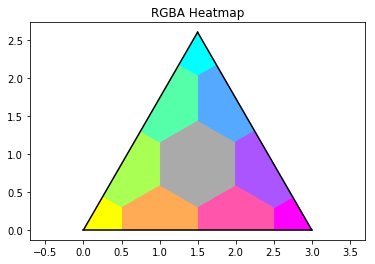

In [104]:
figure, tax = ternary.figure(scale=scale )
tax.heatmap(data, style="hexagonal", colormap=False) # Allow colors as rgba tuples
tax.boundary()
tax.set_title("RGBA Heatmap")
plt.axis('equal')
plt.show()

In [100]:
from ternary.helpers import simplex_iterator

In [75]:
for i in simplex_iterator(2):
    print( i )

(0, 0, 2)
(0, 1, 1)
(0, 2, 0)
(1, 0, 1)
(1, 1, 0)
(2, 0, 0)


In [74]:
simplex_iterator?

In [105]:
## Euclidien 

In [134]:
X = np.linspace(-.2, 1.3, 120)
Y = np.linspace(-.2, 1.2, 100)

D = np.zeros((len(X), len(Y)))

ax, ay = 0, 0
bx, by = 1, 0
cx, cy = .5, np.sqrt(3)/2

In [135]:
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        Da = np.sqrt(  (x-ax)**2 + (y-ay)**2  )
        Db = np.sqrt(  (x-bx)**2 + (y-by)**2  )
        Dc = np.sqrt(  (x-cx)**2 + (y-cy)**2  )
        
        D[i, j] = Da + Db + Dc

(-0.20000000000000001, 1.3, -0.20000000000000001, 1.2)

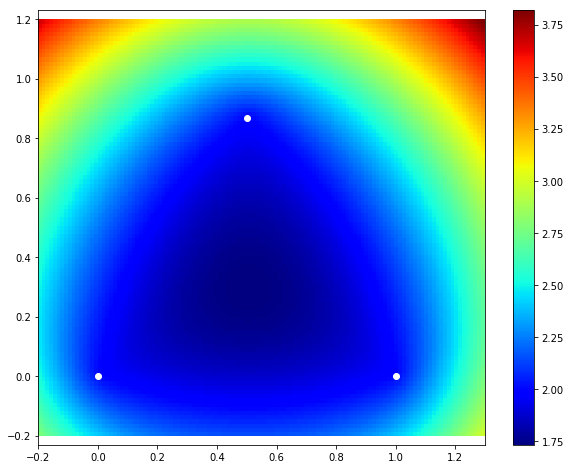

In [144]:
plt.figure(figsize=(10, 8))
plt.pcolor(X, Y, D.transpose(), cmap='jet' )
plt.colorbar()
plt.plot( [ax, bx, cx], [ay, by, cy], 'ow' );
plt.axis('equal')

In [131]:
# RGB ?

In [171]:
X = np.linspace(-2, 3, 200)
Y = np.linspace(-2, 3, 200)

RGB = np.zeros((len(X), len(Y), 3))


for i, x in enumerate(X):
    for j, y in enumerate(Y):
        Da = np.sqrt(  (x-ax)**2 + (y-ay)**2  )
        Db = np.sqrt(  (x-bx)**2 + (y-by)**2  )
        Dc = np.sqrt(  (x-cx)**2 + (y-cy)**2  )
        
        Dabc = np.array([ Da, Db, Dc ])
        # normalise
        rgb = Dabc/ np.max(Dabc)
        
        RGB[i, j, :] = rgb

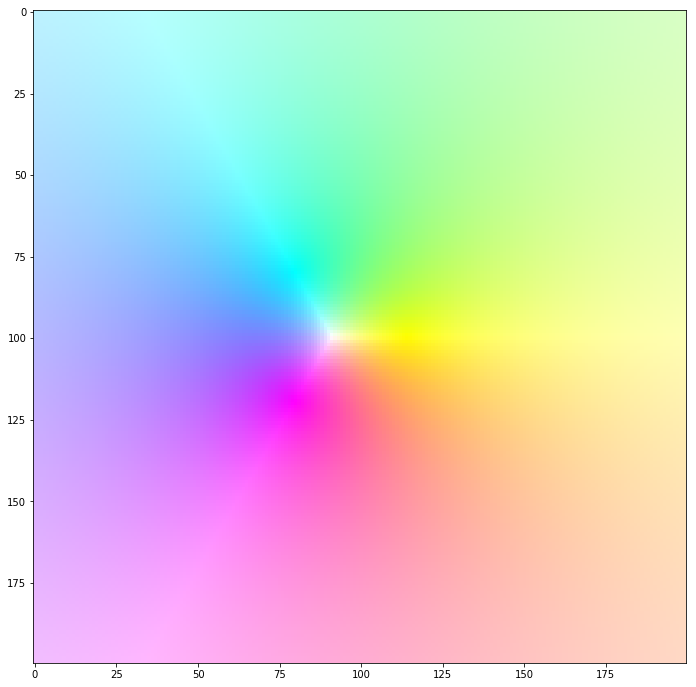

In [172]:
plt.figure( figsize=(12, 12) )
plt.imshow(RGB)

ValueError: too many values to unpack (expected 2)

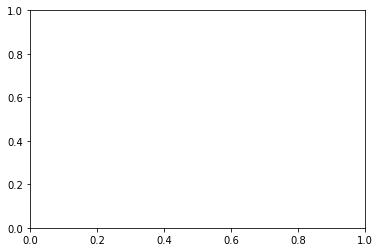

In [153]:
plt.pcolor(RGB)